<a href="https://colab.research.google.com/github/akshayabhale1406/SCLR_Jamboree_Education_Linear_Regression/blob/main/Jamboree_Education_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
df = pd.read_csv("/content/sample_data/Jamboree_Admission.csv")

In [134]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [136]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [137]:
df_non_serial = df.drop(["Serial No."], axis = 1)
df_box_plot = df.iloc[:, 1:7]

In [138]:
print(len(df.columns))

9


In [139]:
print(df_box_plot.iloc[:, 1:2])

     TOEFL Score
0            118
1            107
2            104
3            110
4            103
..           ...
495          108
496          117
497          120
498          103
499          113

[500 rows x 1 columns]


In [140]:
# def box_plot_of_columns (dfa):

#   # fig = plt.subplots(1, 3, figsize = (6, 2))
#   for column in dfa:
#     fig = plt.subplots(1, 2, figsize = (6, 2))
#     sns.boxplot(dfa[column], orient = "h", color = "green")
#     plt.show()

# box_plot_of_columns(df_box_plot)

In [141]:
# def box_plot_of_columns (dfa):

#   fig, axs = plt.subplots(1, 2, figsize = (6, 2))
#   for row in range(len(dfa.columns)):
#     for column in range (2):
#       sns.boxplot(dfa.iloc[:, row], orient = "h", color = "green", ax = axs[1,2])
#       plt.show()

# box_plot_of_columns(df_box_plot)

In [142]:
# def box_plot_of_columns (dfa):
#      for column in dfa:
#        fig, ax = plt.subplots(figsize = (6, 2))  # Create a single subplot
#        sns.boxplot(dfa[column], orient = "h", color = "green", ax=ax)  # Plot on the subplot
#        plt.show()
# box_plot_of_columns(df_box_plot)

<Axes: >

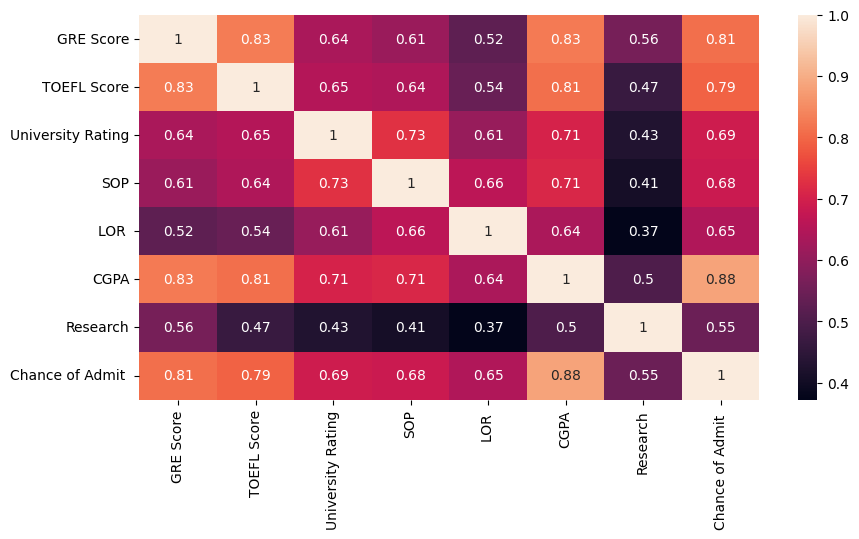

In [148]:
plt.figure(figsize = (10, 5))
sns.heatmap(df_non_serial.corr(), annot = True)

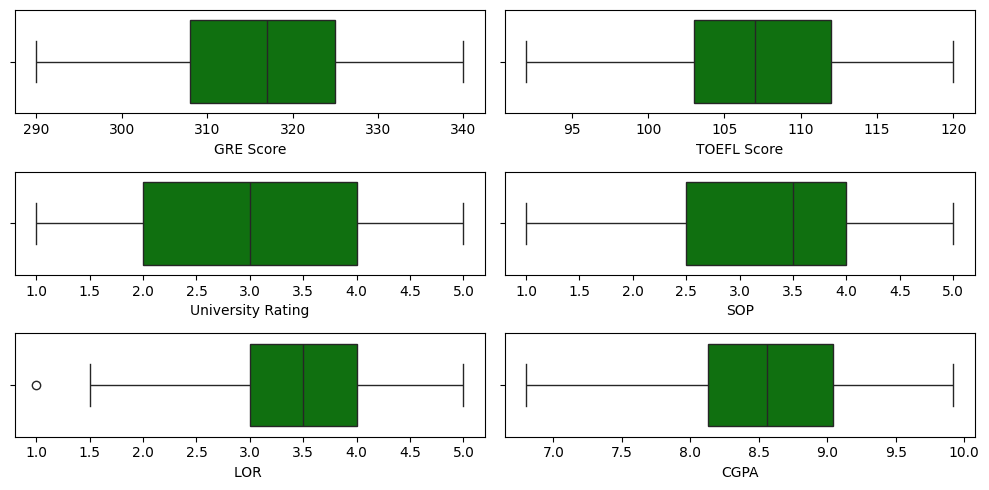

In [144]:
def box_plot_of_columns (dfa):
     fig, axs = plt.subplots(3, 2, figsize = (10, 5))
     ax_index = 0
     for column in dfa:
       row = ax_index // 2
       col = ax_index % 2
       sns.boxplot(dfa[column], orient = "h", color = "green", ax=axs[row, col])
       ax_index += 1
       plt.tight_layout()
     plt.show()
box_plot_of_columns(df_box_plot)

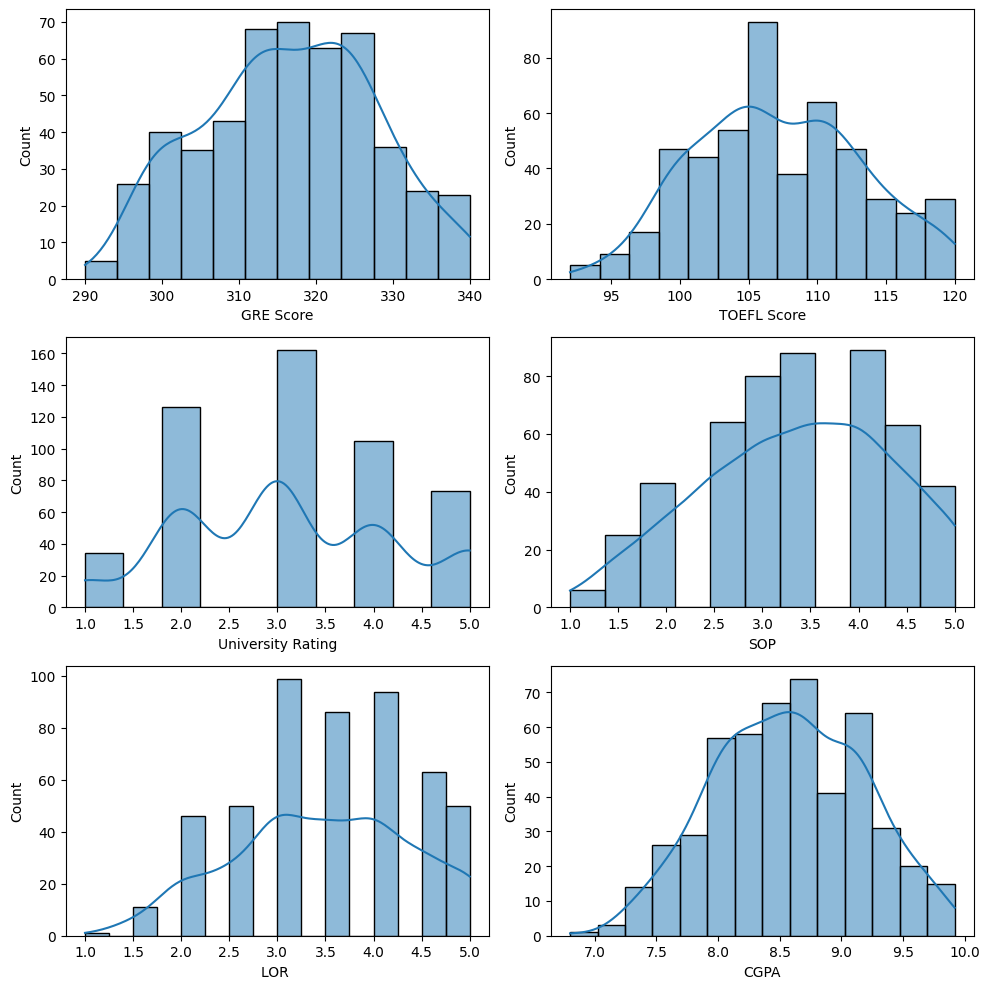

In [154]:
def hist_plot_of_columns (dfa):
     fig, axs = plt.subplots(3, 2, figsize = (10, 10))
     ax_index = 0
     for column in dfa:
       row = ax_index // 2
       col = ax_index % 2
       sns.histplot(dfa[column], ax=axs[row, col], kde = True)
       ax_index += 1
       plt.tight_layout()
     plt.show()
hist_plot_of_columns(df_box_plot)

In [145]:
df_duplicate_check = df.duplicated(keep = False)
df_duplicate_check.value_counts()

,count
False,500


In [146]:
df_new_feature = df.copy()

In [147]:
def admit_possibility_indicator(dfb):
  if dfb["Chance of Admit "] >= 0.9:
    return "High"
  elif 0.9 > dfb["Chance of Admit "] > 0.7:
    return "Medium"
  else:
    return "Low"

df_new_feature['Admission_Possibility'] = df_new_feature.apply(admit_possibility_indicator, axis=1)

df_new_feature.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admission_Possibility
0,1,337,118,4,4.5,4.5,9.65,1,0.92,High
1,2,324,107,4,4.0,4.5,8.87,1,0.76,Medium
2,3,316,104,3,3.0,3.5,8.00,1,0.72,Medium
3,4,322,110,3,3.5,2.5,8.67,1,0.80,Medium
4,5,314,103,2,2.0,3.0,8.21,0,0.65,Low


In [159]:
df["University Rating"].value_counts()

,count
University Rating,
3,162
2,126
4,105
5,73
1,34


In [160]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [162]:
df_scaled = scaler.fit_transform(df_non_serial)
df_scaled = pd.DataFrame(df_scaled, columns = df_non_serial.columns)
df_scaled.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0,0.920635
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0,0.666667
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0,0.603175
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0,0.730159
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0,0.492063
